In [ ]:


#GITHUB LINK: https://github.com/MamilaGun23/MACHINE-LEARNING


from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o', s=100, label='test set')
    plt.legend(loc='upper left')
    plt.show()

Iris class distribution in training set: [35 35 35]


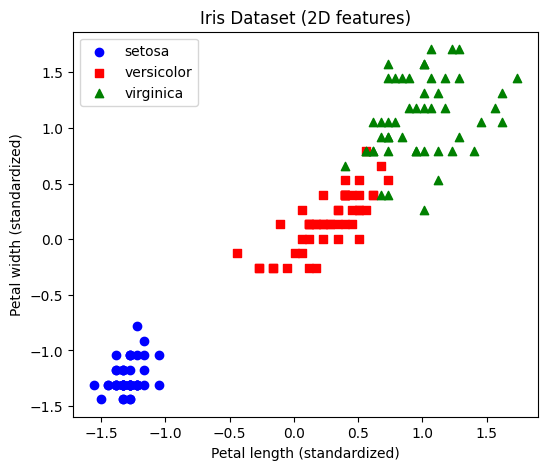

Moons class distribution in training set: [70 70]


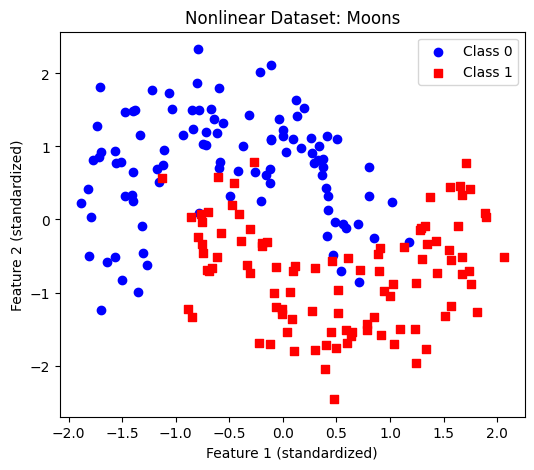

In [ ]:
#GITHUB LINK: https://github.com/MamilaGun23/MACHINE-LEARNING

#EXERCISE 1: Data Preparation and Choosing a Classifier

from sklearn.datasets import load_iris, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Iris dataset
iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Standardize features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Combine sets for visualization
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Print class distribution
print("Iris class distribution in training set:", np.bincount(y_train))

# Plot Iris
plt.figure(figsize=(6, 5))
for lab, marker, color in zip(range(3), ('o', 's', '^'), ('blue', 'red', 'green')):
    plt.scatter(X_combined_std[y_combined == lab, 0],
                X_combined_std[y_combined == lab, 1],
                label=iris.target_names[lab],
                marker=marker,
                color=color)
plt.xlabel("Petal length (standardized)")
plt.ylabel("Petal width (standardized)")
plt.title("Iris Dataset (2D features)")
plt.legend()
plt.show()


# Part 2: Nonlinear dataset (make_moons)
X_moons, y_moons = make_moons(n_samples=200, noise=0.25, random_state=1)

# Split into training and test sets
X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=1, stratify=y_moons
)

# Standardize
sc_moons = StandardScaler()
sc_moons.fit(X_moons_train)
X_moons_train_std = sc_moons.transform(X_moons_train)
X_moons_test_std = sc_moons.transform(X_moons_test)

# Combine sets
X_moons_combined_std = np.vstack((X_moons_train_std, X_moons_test_std))
y_moons_combined = np.hstack((y_moons_train, y_moons_test))

# Print class distribution
print("Moons class distribution in training set:", np.bincount(y_moons_train))

# Plot Moons
plt.figure(figsize=(6, 5))
plt.scatter(X_moons_combined_std[y_moons_combined == 0, 0],
            X_moons_combined_std[y_moons_combined == 0, 1],
            color="blue", marker="o", label="Class 0")
plt.scatter(X_moons_combined_std[y_moons_combined == 1, 0],
            X_moons_combined_std[y_moons_combined == 1, 1],
            color="red", marker="s", label="Class 1")
plt.xlabel("Feature 1 (standardized)")
plt.ylabel("Feature 2 (standardized)")
plt.title("Nonlinear Dataset: Moons")
plt.legend()
plt.show()


Iris dataset (eta0=0.01): Accuracy=1.00


C:\Users\TSHIFHIWA AUSTIN\AppData\Local\Temp\ipykernel_21824\2351608384.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


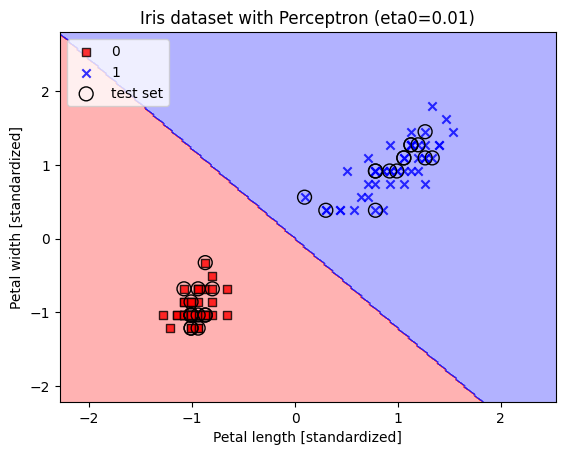

Iris dataset (eta0=0.1): Accuracy=1.00


C:\Users\TSHIFHIWA AUSTIN\AppData\Local\Temp\ipykernel_21824\2351608384.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


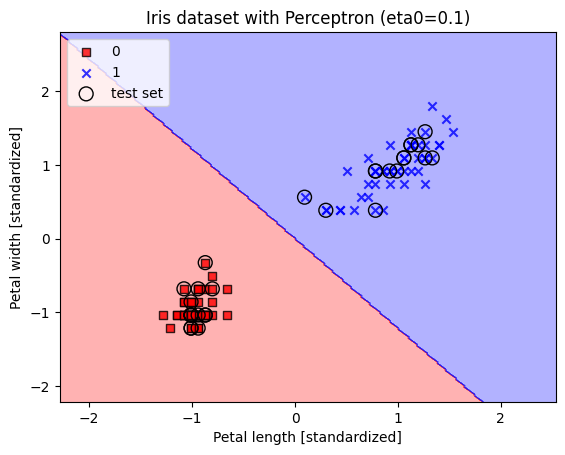

Iris dataset (eta0=1.0): Accuracy=1.00


C:\Users\TSHIFHIWA AUSTIN\AppData\Local\Temp\ipykernel_21824\2351608384.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


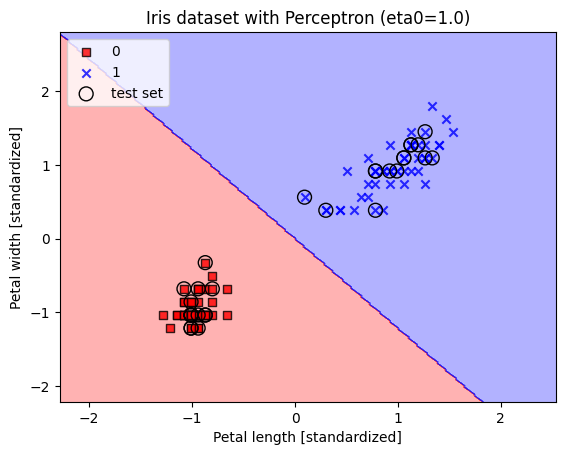

Moons dataset: Accuracy=0.68


C:\Users\TSHIFHIWA AUSTIN\AppData\Local\Temp\ipykernel_21824\2351608384.py:30: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


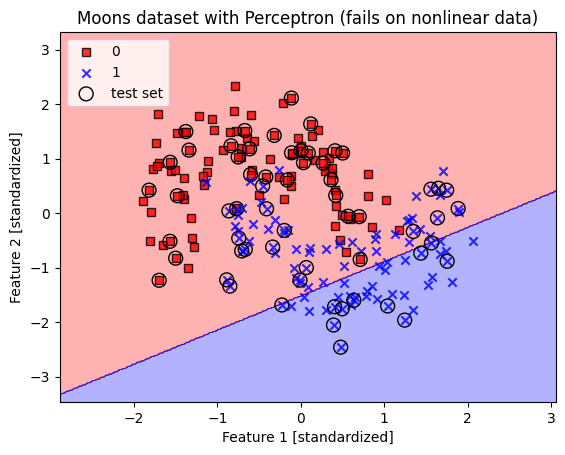

In [ ]:
#GITHUB LINK: https://github.com/MamilaGun23/MACHINE-LEARNING

#EXERCISE 2: Perceptron

plt.close('all')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')


# Part 1: Iris dataset
iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target


X = X[y != 2]
y = y[y != 2]

# Split 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Standardize
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Learning rates
for eta in [0.01, 0.1, 1.0]:
    ppn = Perceptron(max_iter=40, eta0=eta, random_state=1)
    ppn.fit(X_train_std, y_train)
    y_pred = ppn.predict(X_test_std)
    print(f"Iris dataset (eta0={eta}): Accuracy={accuracy_score(y_test, y_pred):.2f}")
    
    plt.figure()
    plot_decision_regions(X_combined_std, y_combined, classifier=ppn,
                          test_idx=range(len(X_train), len(X_combined_std)))
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'Iris dataset with Perceptron (eta0={eta})')
    plt.legend(loc='upper left')
    plt.show()

# Part 2: Nonlinear dataset (Moons)

X_moons, y_moons = make_moons(n_samples=200, noise=0.25, random_state=1)

X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=1, stratify=y_moons
)

sc_moons = StandardScaler()
sc_moons.fit(X_moons_train)
X_moons_train_std = sc_moons.transform(X_moons_train)
X_moons_test_std = sc_moons.transform(X_moons_test)
X_moons_combined_std = np.vstack((X_moons_train_std, X_moons_test_std))
y_moons_combined = np.hstack((y_moons_train, y_moons_test))

ppn_moons = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn_moons.fit(X_moons_train_std, y_moons_train)
y_moons_pred = ppn_moons.predict(X_moons_test_std)
print(f"Moons dataset: Accuracy={accuracy_score(y_moons_test, y_moons_pred):.2f}")

plt.figure()
plot_decision_regions(X_moons_combined_std, y_moons_combined, classifier=ppn_moons,
                      test_idx=range(len(X_moons_train), len(X_moons_combined_std)))
plt.xlabel('Feature 1 [standardized]')
plt.ylabel('Feature 2 [standardized]')
plt.title('Moons dataset with Perceptron (fails on nonlinear data)')
plt.legend(loc='upper left')
plt.show()



# Why it fails on Moons:

# The Iris (setosa vs versicolor) data is linearly separable,so the Perceptron converges and does well.
# The Moons data is nonlinear (curved boundary).



C=0.01
Accuracy: 0.7777777777777778
Probabilities for first 3 samples:
 [[0.14911197 0.35062195 0.50026607]
 [0.52478465 0.29602594 0.17918941]
 [0.55343896 0.28384873 0.1627123 ]]


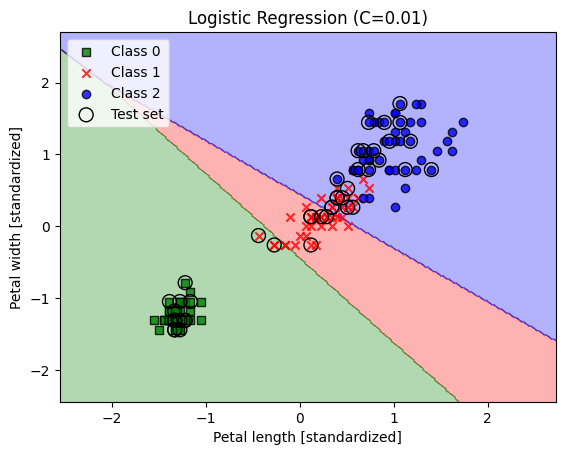


C=1.0
Accuracy: 0.9777777777777777
Probabilities for first 3 samples:
 [[4.78759951e-05 5.94605151e-02 9.40491609e-01]
 [9.08871423e-01 9.11043443e-02 2.42331514e-05]
 [9.49632640e-01 5.03607612e-02 6.59884302e-06]]


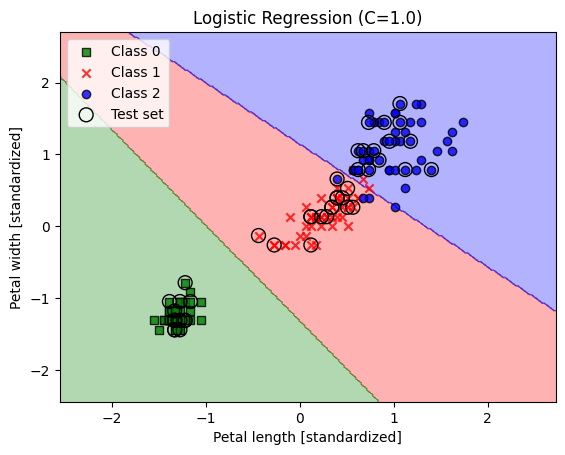


C=100.0
Accuracy: 0.9777777777777777
Probabilities for first 3 samples:
 [[9.37368464e-13 3.91458193e-04 9.99608542e-01]
 [9.93631074e-01 6.36892585e-03 1.20730798e-15]
 [9.98707332e-01 1.29266792e-03 1.82177043e-17]]


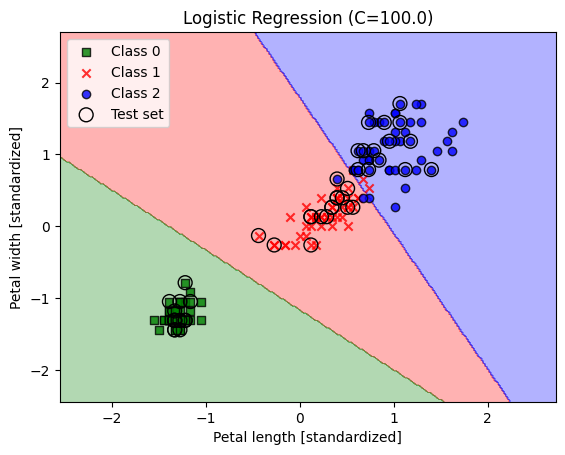

In [ ]:
#GITHUB LINK: https://github.com/MamilaGun23/MACHINE-LEARNING

#EXERCISE 3: Logistic Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    # Assign specific colors to each class: 'x' red, 's' green, 'o' blue
    colors = ('green', 'red', 'blue', 'gray', 'cyan')  
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Decision boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # All points
    for idx, cl in enumerate(np.unique(y)):
        if markers[idx] == 'x':  # red for 'x'
            plt.scatter(X[y == cl, 0], X[y == cl, 1],
                        alpha=0.8, c='red', marker='x',
                        label=f'Class {cl}')
        else:  # filled markers with black edge for 's' and 'o'
            plt.scatter(X[y == cl, 0], X[y == cl, 1],
                        alpha=0.8, c=colors[idx], marker=markers[idx],
                        edgecolor='black', label=f'Class {cl}')

    # Highlight test samples
    if test_idx is not None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

# Load Iris dataset
iris = load_iris()
X = iris.data[:, [2, 3]]  
y = iris.target

# Train/test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Training Logistic Regression with different C values
for C in [0.01, 1.0, 100.0]:
    lr = LogisticRegression(C=C, random_state=1, solver='lbfgs')
    lr.fit(X_train_std, y_train)

    y_pred = lr.predict(X_test_std)
    print(f"\nC={C}")
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Probabilities for first 3 samples:\n', lr.predict_proba(X_test_std[:3]))

    # Plot decision regions
    plt.figure()
    plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                          test_idx=range(len(X_train), len(X_combined_std)))
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'Logistic Regression (C={C})')
    plt.legend(loc='upper left')
    plt.show()



Accuracy (C=1.0): 0.9777777777777777


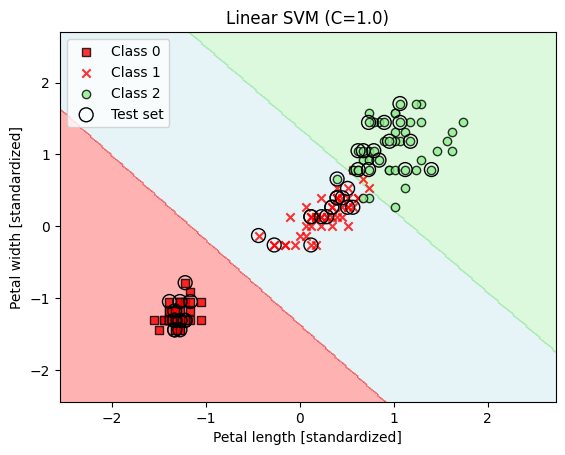

Accuracy (C=100.0): 0.9777777777777777


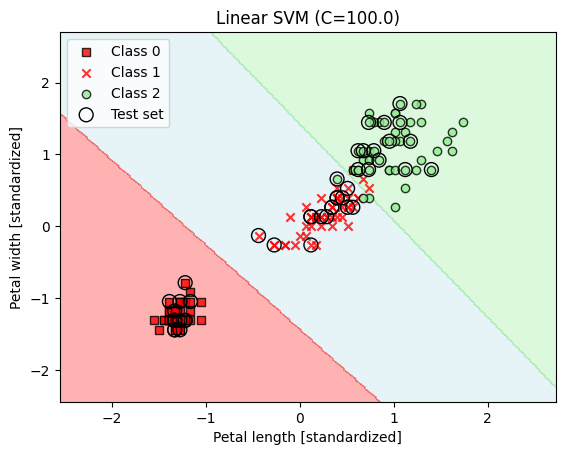

Number of support vectors for each class: [2 6 6]
Support vectors:
 [[-1.05383474 -1.04507821]
 [-1.16537974 -0.91397521]
 [-0.27301968 -0.2584602 ]
 [ 0.61934037  0.3970548 ]
 [ 0.61934037  0.3970548 ]
 [ 0.56356787  0.79036381]
 [ 0.73088538  0.5281578 ]
 [ 0.67511288  0.65926081]
 [ 0.56356787  0.79036381]
 [ 1.0097479   0.2659518 ]
 [ 0.56356787  0.79036381]
 [ 0.61934037  0.79036381]
 [ 0.73088538  0.3970548 ]
 [ 0.67511288  0.3970548 ]]


In [ ]:
#GITHUB LINK: https://github.com/MamilaGun23/MACHINE-LEARNING

#EXERCISE 4: Support Vector Machines (SVM)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Linear SVM with C=1.0 
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Accuracy (C=1.0):', accuracy_score(y_test, y_pred))

# Plot decision regions
plt.figure()
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                      test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title('Linear SVM (C=1.0)')
plt.legend(loc='upper left')
plt.show()

# Effect of larger C 
svm_highC = SVC(kernel='linear', C=100.0, random_state=1)
svm_highC.fit(X_train_std, y_train)
y_pred_highC = svm_highC.predict(X_test_std)
print('Accuracy (C=100.0):', accuracy_score(y_test, y_pred_highC))

plt.figure()
plot_decision_regions(X_combined_std, y_combined, classifier=svm_highC,
                      test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title('Linear SVM (C=100.0)')
plt.legend(loc='upper left')
plt.show()

# Identify support vectors 
print("Number of support vectors for each class:", svm_highC.n_support_)
print("Support vectors:\n", svm_highC.support_vectors_)


Linear SVM Accuracy: 0.9777777777777777


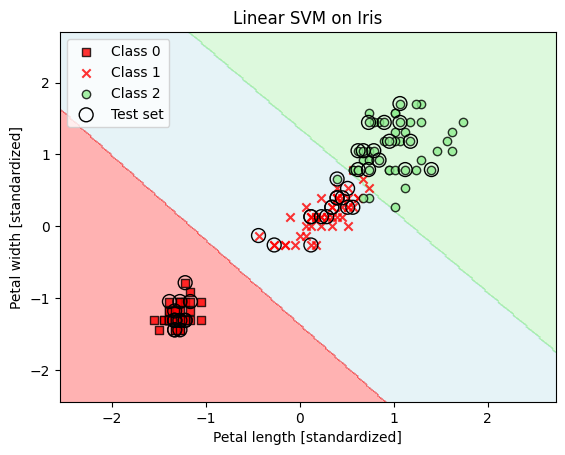

RBF SVM (gamma=0.01) Accuracy: 0.9777777777777777


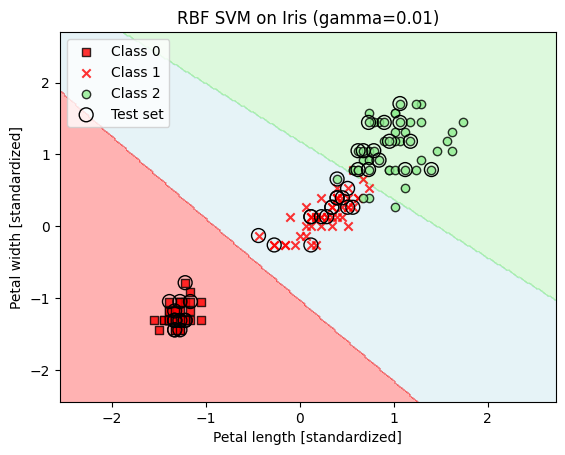

RBF SVM (gamma=1.0) Accuracy: 0.9777777777777777


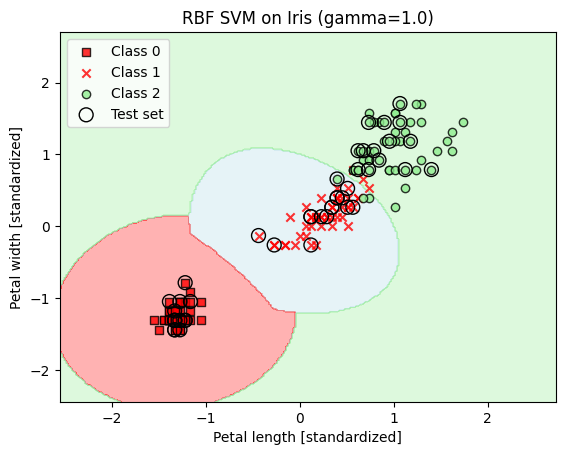

RBF SVM (gamma=100.0) Accuracy: 0.9333333333333333


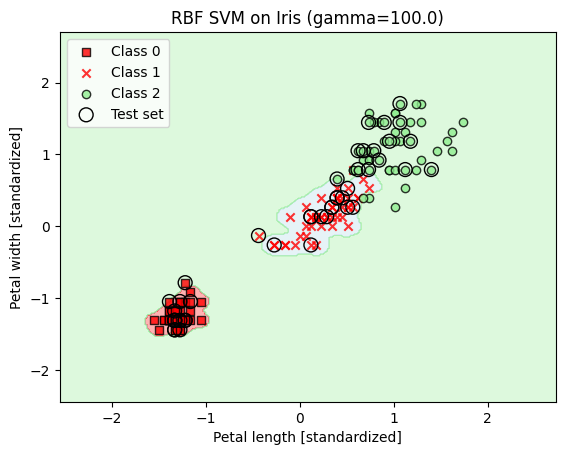

In [ ]:
#GITHUB LINK: https://github.com/MamilaGun23/MACHINE-LEARNING

#EXERCISE 5: Kernel SVM

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'lightblue', 'lightgreen', 'gray', 'cyan')  # 'x' class red
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Decision boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot all points
    for idx, cl in enumerate(np.unique(y)):
        if markers[idx] == 'x':
            plt.scatter(X[y == cl, 0], X[y == cl, 1],
                        alpha=0.8, c='red', marker='x',
                        label=f'Class {cl}')
        else:
            plt.scatter(X[y == cl, 0], X[y == cl, 1],
                        alpha=0.8, c=colors[idx], marker=markers[idx],
                        edgecolor='black', label=f'Class {cl}')

    if test_idx is not None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o', s=100, label='Test set')

# Iris dataset 
iris = load_iris()
X = iris.data[:, [2, 3]]  
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Linear SVM
linear_svm = SVC(kernel='linear', C=1.0, random_state=1)
linear_svm.fit(X_train_std, y_train)
y_pred_linear = linear_svm.predict(X_test_std)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))

plt.figure()
plot_decision_regions(X_combined_std, y_combined, classifier=linear_svm,
                      test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title('Linear SVM on Iris')
plt.legend(loc='upper left')
plt.show()

# RBF SVM (gamma tuning for overfitting)
for gamma in [0.01, 1.0, 100.0]:
    rbf_svm = SVC(kernel='rbf', gamma=gamma, C=1.0, random_state=1)
    rbf_svm.fit(X_train_std, y_train)
    y_pred_rbf = rbf_svm.predict(X_test_std)
    print(f"RBF SVM (gamma={gamma}) Accuracy:", accuracy_score(y_test, y_pred_rbf))

    plt.figure()
    plot_decision_regions(X_combined_std, y_combined, classifier=rbf_svm,
                          test_idx=range(len(X_train), len(X_combined_std)))
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'RBF SVM on Iris (gamma={gamma})')
    plt.legend(loc='upper left')
    plt.show()



Accuracy: 0.9777777777777777


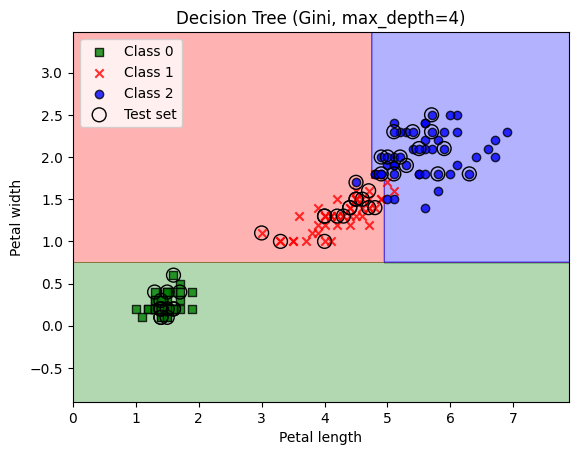

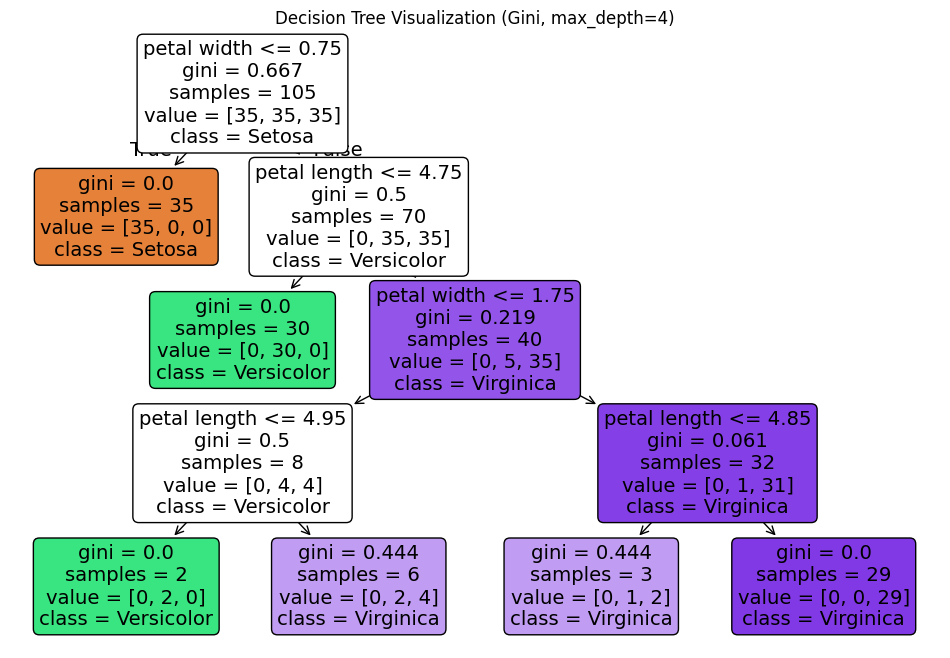

In [ ]:
#GITHUB LINK: https://github.com/MamilaGun23/MACHINE-LEARNING

#EXERCISE 6: Decision Trees 

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Decision tree with Gini criterion
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)  

# Predictions
y_pred = tree.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

# Plot decision regions
X_combined = np.vstack((X_train, X_test))
plot_decision_regions(X_combined, y_combined, classifier=tree,
                      test_idx=range(len(X_train), len(X_combined)))
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Decision Tree (Gini, max_depth=4)')
plt.legend(loc='upper left')
plt.show()


plt.figure(figsize=(12,8))
plot_tree(tree, filled=True, rounded=True,
          class_names=['Setosa', 'Versicolor', 'Virginica'],
          feature_names=['petal length', 'petal width'])
plt.title('Decision Tree Visualization (Gini, max_depth=4)')
plt.show()




Accuracy (n_estimators=25): 0.9777777777777777
Feature Importances: [0.52140135 0.47859865]


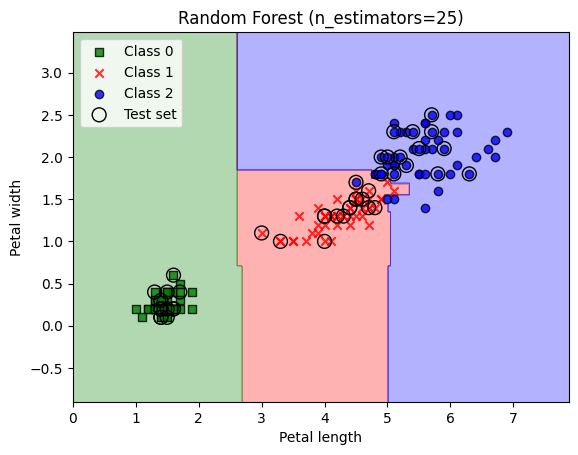

Accuracy (n_estimators=100): 0.9777777777777777
Feature Importances: [0.48273366 0.51726634]


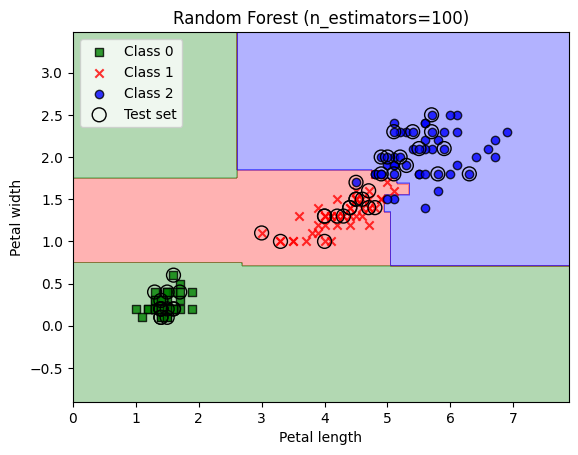

OOB Score: 0.9428571428571428
Accuracy (OOB forest): 0.9777777777777777
Feature Importances: [0.48273366 0.51726634]


In [ ]:
#GITHUB LINK: https://github.com/MamilaGun23/MACHINE-LEARNING

#EXERCISE 7: Random Forests

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


# Random Forest with 25 trees
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy (n_estimators=25):', accuracy_score(y_test, y_pred))
print('Feature Importances:', forest.feature_importances_)

# Plot decision regions
X_combined = np.vstack((X_train, X_test))
plot_decision_regions(X_combined, y_combined, classifier=forest,
                      test_idx=range(len(X_train), len(X_combined)))
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Random Forest (n_estimators=25)')
plt.legend(loc='upper left')
plt.show()


# Random Forest with 100 trees
forest_100 = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, n_jobs=2)
forest_100.fit(X_train, y_train)

y_pred_100 = forest_100.predict(X_test)
print('Accuracy (n_estimators=100):', accuracy_score(y_test, y_pred_100))
print('Feature Importances:', forest_100.feature_importances_)

# Plot decision regions
plt.figure()
plot_decision_regions(X_combined, y_combined, classifier=forest_100,
                      test_idx=range(len(X_train), len(X_combined)))
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Random Forest (n_estimators=100)')
plt.legend(loc='upper left')
plt.show()


# Random Forest with OOB score
forest_oob = RandomForestClassifier(criterion='gini', n_estimators=100, oob_score=True,
                                    random_state=1, n_jobs=2)
forest_oob.fit(X_train, y_train)

print('OOB Score:', forest_oob.oob_score_)
print('Accuracy (OOB forest):', accuracy_score(y_test, forest_oob.predict(X_test)))
print('Feature Importances:', forest_oob.feature_importances_)


Accuracy (n_neighbors=5, Manhattan): 0.9777777777777777


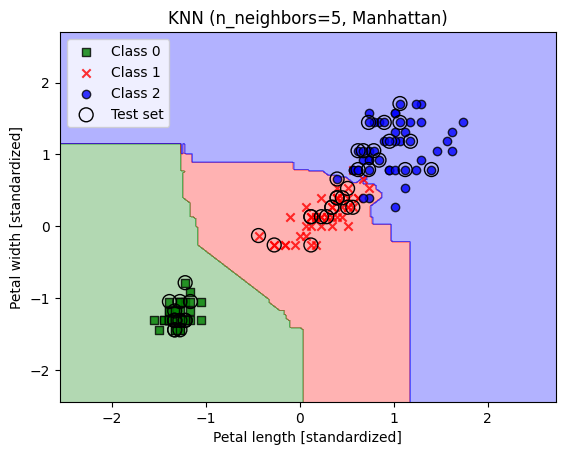

Accuracy (n_neighbors=1, Manhattan): 0.9777777777777777


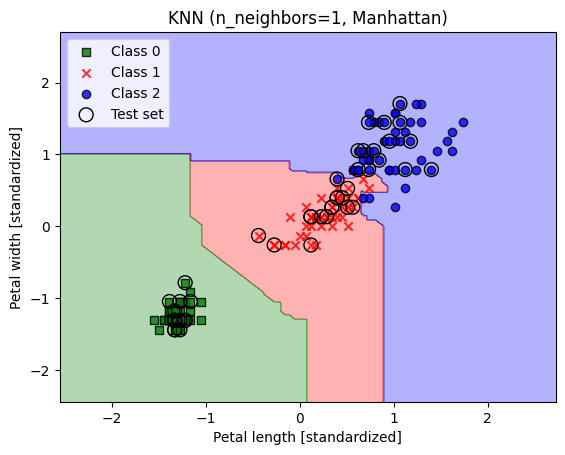

Accuracy (n_neighbors=10, Manhattan): 0.9777777777777777


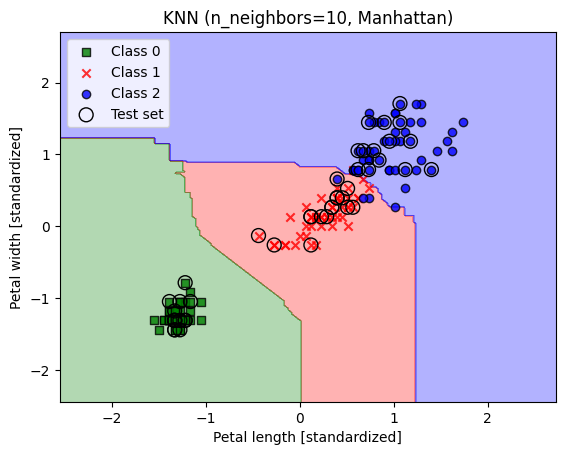

In [ ]:
#GITHUB LINK: https://github.com/MamilaGun23/MACHINE-LEARNING

#EXERCISE 8: K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


# KNN with n_neighbors=5, Manhattan distance (p=1)
knn_5 = KNeighborsClassifier(n_neighbors=5, p=1, metric='minkowski')
knn_5.fit(X_train_std, y_train)

y_pred_5 = knn_5.predict(X_test_std)
print('Accuracy (n_neighbors=5, Manhattan):', accuracy_score(y_test, y_pred_5))

plt.figure()
plot_decision_regions(X_combined_std, y_combined, classifier=knn_5,
                      test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title('KNN (n_neighbors=5, Manhattan)')
plt.legend(loc='upper left')
plt.show()

# Vary n_neighbors to illustrate underfitting and overfitting (Manhattan distance)
for k in [1, 10]:
    knn_k = KNeighborsClassifier(n_neighbors=k, p=1, metric='minkowski')
    knn_k.fit(X_train_std, y_train)
    y_pred_k = knn_k.predict(X_test_std)
    print(f'Accuracy (n_neighbors={k}, Manhattan):', accuracy_score(y_test, y_pred_k))

    plt.figure()
    plot_decision_regions(X_combined_std, y_combined, classifier=knn_k,
                          test_idx=range(len(X_train), len(X_combined_std)))
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'KNN (n_neighbors={k}, Manhattan)')
    plt.legend(loc='upper left')
    plt.show()


   #DISCUSSION:

# Underfitting (High Bias)

# Occurs when the model is too simple to capture the patterns in the data. 
# In KNN, this happens when the number of neighbors (k) is too large (e.g., k=10). 
# The classifier averages over many neighbors, producing overly smooth decision boundaries 
# that fail to separate classes properly. Result: low training accuracy, poor fit to data, 
# and inability to capture local structures.

# Overfitting (High Variance)

# Occurs when the model is too sensitive to the training data. 
# In KNN, this happens when k is very small (e.g., k=1). 
# The classifier closely follows the training points, creating jagged, highly flexible 
# decision boundaries that fit noise. Result: high training accuracy, but poor 
# generalization to unseen test data.



LogReg Best params: {'C': 0.1, 'solver': 'lbfgs'}
LogReg Best CV score: 0.9523809523809523
KNN Best params: {'n_neighbors': 1, 'p': 1}
KNN Best CV score: 0.9714285714285713
Logistic Regression Accuracy on test set: 1.0
KNN Accuracy on test set: 0.9777777777777777

Accuracy Comparison Table:
            Classifier  Test Accuracy
0  Logistic Regression       1.000000
1                  KNN       0.977778


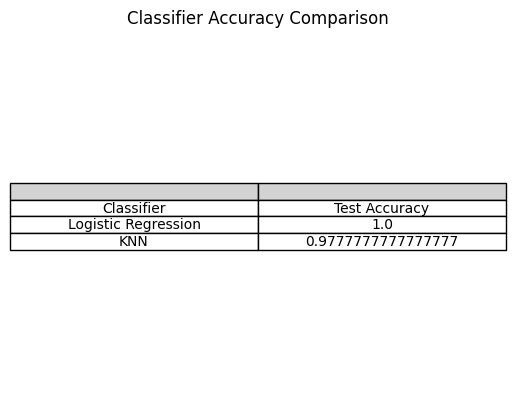

In [ ]:
#GITHUB LINK: https://github.com/MamilaGun23/MACHINE-LEARNING

#EXERCISE 9: Hyperparameter Tuning and Comparison

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# GridSearchCV for Logistic Regression
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_lr.fit(X_train_std, y_train)
print('LogReg Best params:', grid_lr.best_params_)
print('LogReg Best CV score:', grid_lr.best_score_)

# GridSearchCV for KNN (Manhattan distance)
param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 10], 'p': [1]}  
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train_std, y_train)
print('KNN Best params:', grid_knn.best_params_)
print('KNN Best CV score:', grid_knn.best_score_)

# Compare test set accuracies across classifiers
models = {
    'Logistic Regression': grid_lr.best_estimator_,
    'KNN': grid_knn.best_estimator_
}

accuracy_results = []
for name, model in models.items():
    y_pred = model.predict(X_test_std)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results.append(acc)
    print(f'{name} Accuracy on test set: {acc}')

# Create comparison table
accuracy_table = pd.DataFrame({
    'Classifier': list(models.keys()),
    'Test Accuracy': accuracy_results
})
print("\nAccuracy Comparison Table:")
print(accuracy_table)

# Visual comparison table
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table_data = [accuracy_table.columns.values.tolist()] + accuracy_table.values.tolist()
ax.table(cellText=table_data, loc='center', cellLoc='center', colColours=['lightgrey']*2)
plt.title('Classifier Accuracy Comparison')
plt.show()
